### "Employee_Attrition_Prediction"
# Por: Edwin Gustavo Lima

Predicción sobre el desgaste de la producción de los empleados. Utilizando los algoritmos Random Forest, Regresión Logistica y Redes Neuronales

Librerías a utilizar

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Montar la carpeta de Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Se carga el archivo "Employee_Attrition.csv" desde google drive 

In [ ]:
employee_df = pd.read_csv("/content/drive/My Drive/ProyectoFinalAD/Eployee_Attrition.csv")

Se realiza un análisis exploratorio

In [ ]:
employee_df.head(5)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,...,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,employee_source
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,7,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,8,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,9,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


Mostrando los últimos 5 registros del data set

In [ ]:
employee_df.tail(5)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,...,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,employee_source
23419,60.0,Current employee,Travel_Rarely,370.0,Research & Development,1.0,4.0,Medical,1.0,19344,...,80.0,1.0,20.0,2.0,3.0,20.0,7.0,2.0,13.0,Company Website
23420,60.0,Current employee,Travel_Rarely,370.0,Research & Development,1.0,4.0,Life Sciences,1.0,19345,...,80.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,0.0,Company Website
23421,NaN,Voluntary Resignation,Travel_Frequently,1009.0,Research & Development,1.0,3.0,Life Sciences,1.0,16794,...,80.0,2.0,4.0,2.0,2.0,2.0,1.0,2.0,2.0,Adzuna
23422,NaN,Current employee,Travel_Rarely,1354.0,Research & Development,5.0,3.0,Medical,1.0,1956,...,80.0,0.0,14.0,6.0,3.0,11.0,10.0,5.0,8.0,Indeed
23423,NaN,Current employee,Non-Travel,1142.0,Research & Development,8.0,2.0,Life Sciences,1.0,17587,...,80.0,0.0,8.0,2.0,3.0,2.0,2.0,2.0,2.0,Recruit.net


Se realiza una revisión de las caracteristicas del data set

In [ ]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23424 entries, 0 to 23423
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       23421 non-null  float64
 1   attrition                 23411 non-null  object 
 2   businesstravel            23416 non-null  object 
 3   dailyrate                 23413 non-null  float64
 4   department                23413 non-null  object 
 5   distancefromhome          23415 non-null  float64
 6   education                 23412 non-null  float64
 7   educationfield            23415 non-null  object 
 8   employeecount             23419 non-null  float64
 9   employeenumber            23424 non-null  int64  
 10  application_id            23424 non-null  int64  
 11  environmentsatisfaction   23416 non-null  float64
 12  gender                    23415 non-null  object 
 13  hourlyrate                23416 non-null  float64
 14  jobinv

Se realiza un resumen de las variables númericas.

In [ ]:
employee_df.describe()

,age,dailyrate,distancefromhome,education,employeecount,employeenumber,application_id,environmentsatisfaction,hourlyrate,jobinvolvement,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
count,23421.000000,23413.000000,23415.000000,23412.000000,23419.0,23424.000000,23424.000000,23416.000000,23416.000000,23416.000000,...,23417.000000,23415.0,23416.000000,23417.000000,23414.000000,23415.000000,23412.000000,23410.000000,23414.000000,23418.000000
mean,36.936467,801.741554,9.164638,2.909833,1.0,11741.764985,135197.987406,2.718526,65.859498,2.729800,...,2.713413,80.0,0.792962,11.259427,2.797941,2.761819,7.011276,4.226442,2.183096,4.127466
std,9.137014,403.173738,8.094804,1.024927,0.0,6786.583874,6786.348515,1.095558,20.349416,0.710239,...,1.080105,0.0,0.851178,7.772976,1.290124,0.705827,6.139018,3.625517,3.217112,3.572291
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,123456.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,5867.750000,129322.750000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,11740.500000,135196.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,17613.250000,141070.250000,4.000000,83.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,23517.000000,146972.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Se hace una revisión de la cantidad de valores nulos por campo.

In [ ]:
employee_df.isnull().sum()

age                          3
attrition                   13
businesstravel               8
dailyrate                   11
department                  11
distancefromhome             9
education                   12
educationfield               9
employeecount                5
employeenumber               0
application_id               0
environmentsatisfaction      8
gender                       9
hourlyrate                   8
jobinvolvement               8
joblevel                     6
jobrole                      8
jobsatisfaction              8
maritalstatus               10
monthlyincome               12
monthlyrate                 10
numcompaniesworked           8
over18                       9
overtime                    11
percentsalaryhike           13
performancerating            9
relationshipsatisfaction     7
standardhours                9
stockoptionlevel             8
totalworkingyears            7
trainingtimeslastyear       10
worklifebalance              9
yearsatc

De la celda anterior, se observa que aún existen valores NA,  por lo que el paso siguiente es eliminarlos.

In [ ]:
employee_df = employee_df.dropna()

Corremos nuevamente el codigo para la sumatoria de NA, y vemos que todos los campos se encuentran sin valores NA

In [ ]:
employee_df.isna().sum()

age                         0
attrition                   0
businesstravel              0
dailyrate                   0
department                  0
distancefromhome            0
education                   0
educationfield              0
employeecount               0
employeenumber              0
application_id              0
environmentsatisfaction     0
gender                      0
hourlyrate                  0
jobinvolvement              0
joblevel                    0
jobrole                     0
jobsatisfaction             0
maritalstatus               0
monthlyincome               0
monthlyrate                 0
numcompaniesworked          0
over18                      0
overtime                    0
percentsalaryhike           0
performancerating           0
relationshipsatisfaction    0
standardhours               0
stockoptionlevel            0
totalworkingyears           0
trainingtimeslastyear       0
worklifebalance             0
yearsatcompany              0
yearsincur

Pasamos a valor númerico las columnas que tengan algun dato tipo caracter.

In [ ]:
employee_df['attrition'] = employee_df['attrition'].apply(lambda x:1 if x == 'Voluntary Resignation' else 0)

In [ ]:
employee_df['over18'] = employee_df['over18'].apply(lambda x: 1 if x == 'Y' else 0)

In [ ]:
employee_df['overtime'] = employee_df['overtime'].apply(lambda x: 1 if x == 'Yes' or x== 'Y' else 0)

In [ ]:
employee_df['gender'] = employee_df['gender'].apply(lambda x: 1 if x == 'Female' else 0)

Utilizamos matplotlib para validar gráficamente que no existen valores nulos.

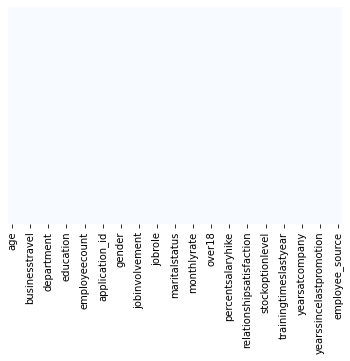

In [ ]:
sns.heatmap(employee_df.isnull(), yticklabels=False, cbar=False, cmap = "Blues")

 Con las gráficas siguientes se valida que podemos prescindir de los campos de 'employeecount', 'standardhours' y 'over18' 

ya que estos campos no cambian de un empleado a otro y no aportan relevancia al modelo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9bb6ac5a90>,
      dtype=object)

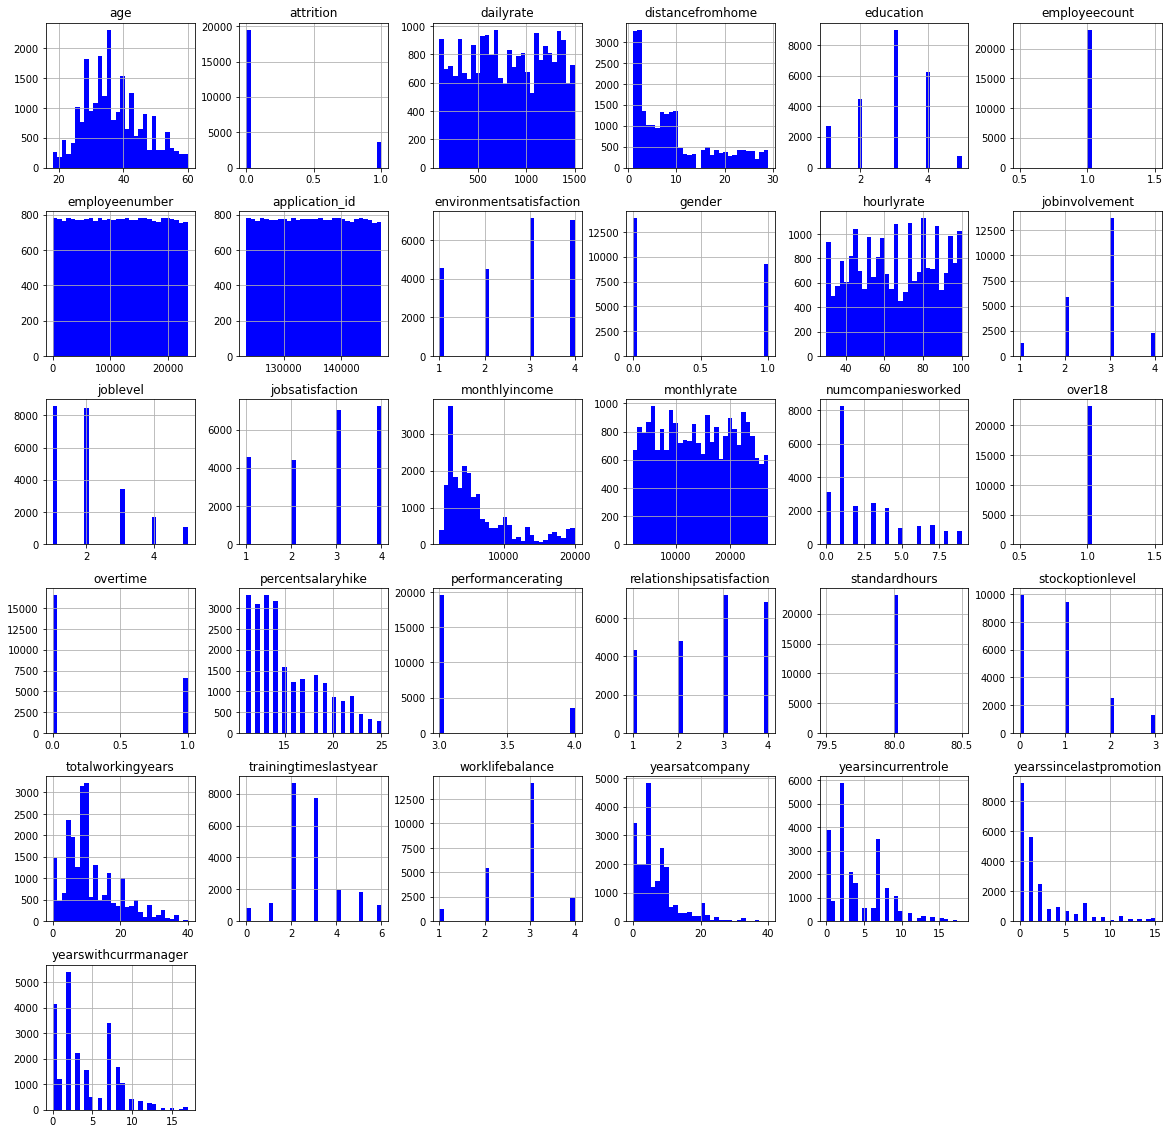

In [ ]:
employee_df.hist(bins = 30, figsize=(20,20), color = 'b')


### Eliminar campos sin relevancia  

In [ ]:
employee_df.drop(["employeecount", "standardhours", "over18", "employeenumber"], axis = 1, inplace = True)

Graficamos la matriz de correlación para validar que variables se encuentran fuertemente relacionadas

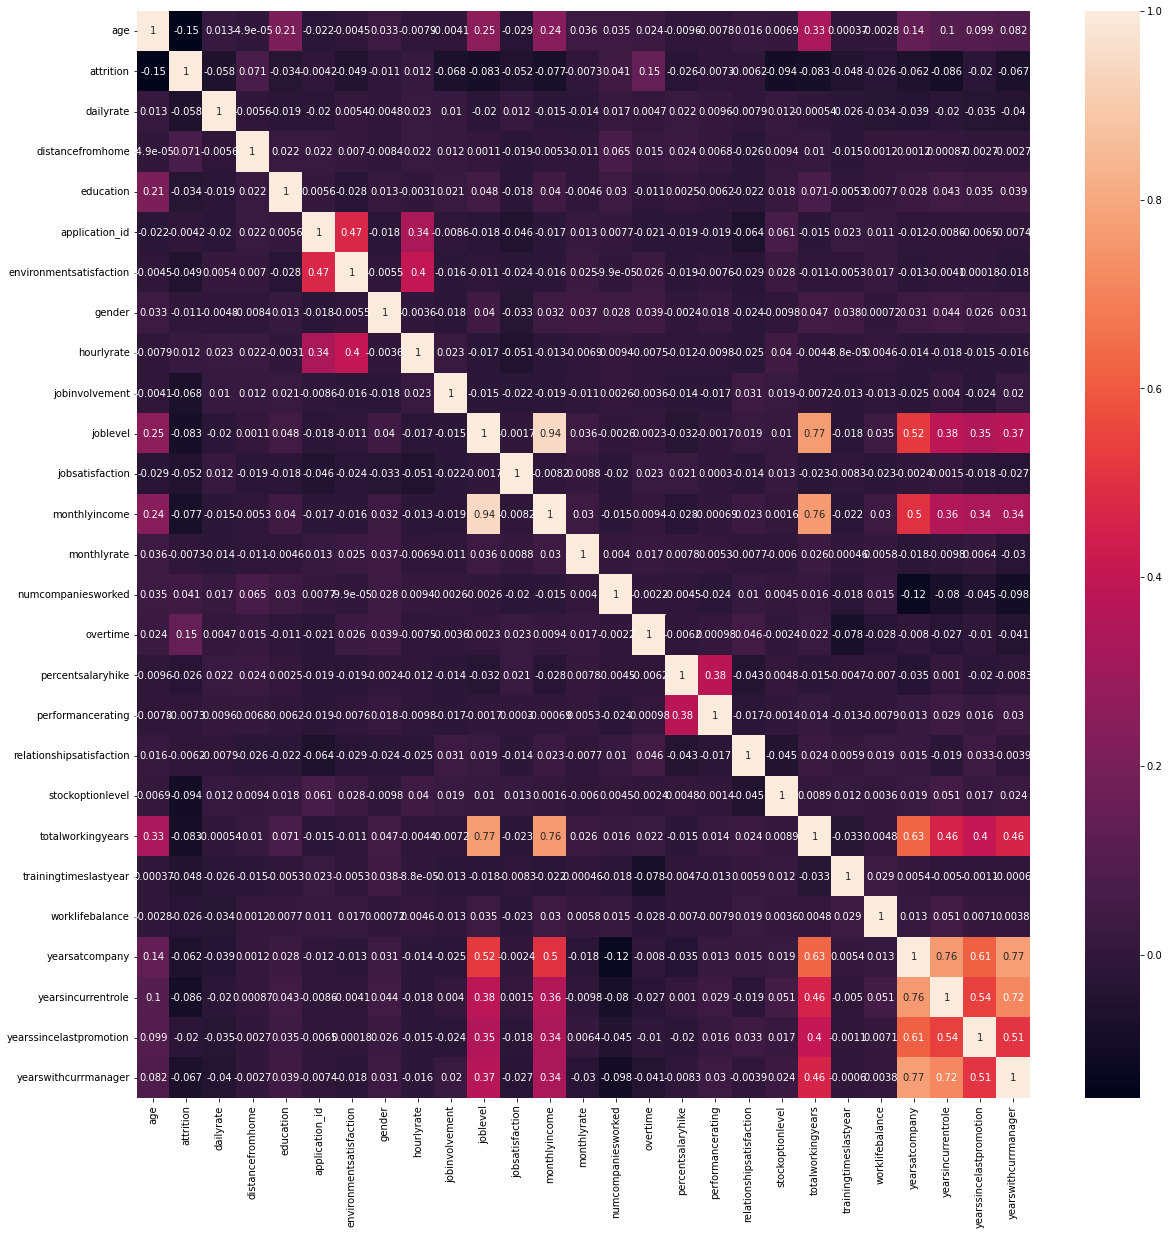

In [ ]:
correlations = employee_df.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot=True)

Se realiza una verificaión de cuáles son las variables categoricas de nuestro data set

In [ ]:
categoricas = [var for var in employee_df.columns if employee_df[var].dtype=='O']
print('Existen {} variables categóricas\n'.format(len(categoricas)))

print('Las cuales son:\n\n', categoricas)

Existen 6 variables categóricas

Las cuales son:

 ['businesstravel', 'department', 'educationfield', 'jobrole', 'maritalstatus', 'employee_source']


Se asignan las 6 variables categóricas a X_cat, para posteriormente pasarlas de categóricas a numericas. 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = employee_df.loc[:, employee_df.columns != 'attrition']
Y = employee_df['attrition']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

cambiamos las variables categoricas a numericas.

In [ ]:
from sklearn import preprocessing

categorical = ['businesstravel', 'department', 'educationfield', 'jobrole', 'maritalstatus', 'employee_source']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

## Algoritmo de Regresión Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

84.49

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)

Matriz de confusion

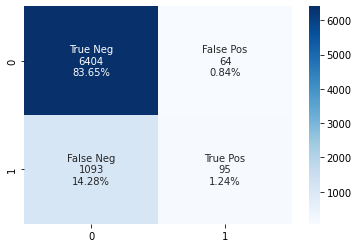

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      6468
           1       0.60      0.08      0.14      1188

    accuracy                           0.85      7656
   macro avg       0.73      0.54      0.53      7656
weighted avg       0.81      0.85      0.80      7656



## Algoritmo Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [ ]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
model = classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
acc_rf = round(model.score(X_test, y_test) * 100, 2)
acc_rf

99.6

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)

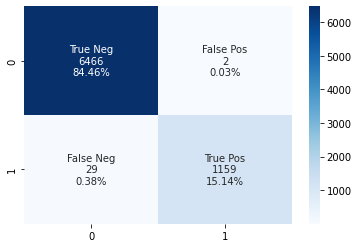

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6468
           1       1.00      0.98      0.99      1188

    accuracy                           1.00      7656
   macro avg       1.00      0.99      0.99      7656
weighted avg       1.00      1.00      1.00      7656



## Algoritmo de Redes Neuronales

In [ ]:
import tensorflow as tf

Se utilizará un modelo secuenial de capa tras capa, es del tipo capa densa debido a que todas las neuronas van conectadas a la siguiente capa y entre ellas.

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units = 500, activation='relu', input_shape=(32, )))
model.add(tf.keras.layers.Dense(units = 500, activation='relu'))
model.add(tf.keras.layers.Dense(units = 500, activation='relu'))
## Capa de salida, con una salida con activación de Sigmoid. valor continuo entre 0 y 1.
model.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               16500     
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 1)                 501       
                                                                 
Total params: 518,001
Trainable params: 518,001
Non-trainable params: 0
_________________________________________________________________


Se compila el modelo utilizando el optimizador "Adam", y se utiliza la función de perdida para medir el error, al tener una salida probabilistica entre 0 Y 1, se utiliza Bynary Crossentropy.

In [ ]:
model.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics=['accuracy'])

Utilizamos epochs, para indicar cuantas veces se ejecutará el model y observar como va variando precisión, en nuestro caso se indico epochs=100 para que se ejecute 100 veces.

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size=50)

Epoch 1/100
311/311 [==============================] - 8s 18ms/step - loss: 0.3618 - accuracy: 0.8527
Epoch 2/100
311/311 [==============================] - 5s 17ms/step - loss: 0.1862 - accuracy: 0.9309
Epoch 3/100
311/311 [==============================] - 5s 15ms/step - loss: 0.0771 - accuracy: 0.9748
Epoch 4/100
311/311 [==============================] - 5s 15ms/step - loss: 0.0320 - accuracy: 0.9901
Epoch 5/100
311/311 [==============================] - 4s 14ms/step - loss: 0.0285 - accuracy: 0.9912
Epoch 6/100
311/311 [==============================] - 3s 9ms/step - loss: 0.0255 - accuracy: 0.9918
Epoch 7/100
311/311 [==============================] - 3s 10ms/step - loss: 0.0185 - accuracy: 0.9940
Epoch 8/100
311/311 [==============================] - 3s 9ms/step - loss: 0.0165 - accuracy: 0.9947
Epoch 9/100
311/311 [==============================] - 3s 9ms/step - loss: 0.0144 - accuracy: 0.9955
Epoch 10/100
311/311 [==============================] - 3s 9ms/step - loss: 0.0067 - 

Se realiza la prediccción de probabilidad de salida por usuario.

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[1.0025680e-20],
       [1.0000000e+00],
       [1.0000000e+00],
       ...,
       [1.2673392e-22],
       [1.0000000e+00],
       [6.1854825e-14]], dtype=float32)

Verificamos la probabilidad de que el usuario abandone la empresa, con una probabilidad > 50%

In [ ]:
y_pred = (y_pred > 0.50)
y_pred 

array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [ True],
       [False]])

función de perdida y precisión

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

Función Perdida del modelo durante el entrenamiento

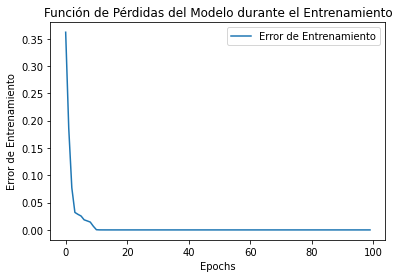

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title("Función de Pérdidas del Modelo durante el Entrenamiento")
plt.xlabel("Epochs")
plt.ylabel("Error de Entrenamiento")
plt.legend(["Error de Entrenamiento"])

Función Tasa del Acierto del modelo durante el entrenamiento

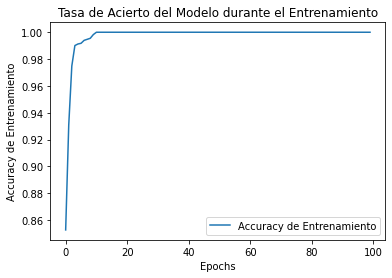

In [ ]:
plt.plot(epochs_hist.history['accuracy'])
plt.title("Tasa de Acierto del Modelo durante el Entrenamiento")
plt.xlabel("Epochs")
plt.ylabel("Accuracy de Entrenamiento")
plt.legend(["Accuracy de Entrenamiento"])

Resultados en el conjunto de test

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)

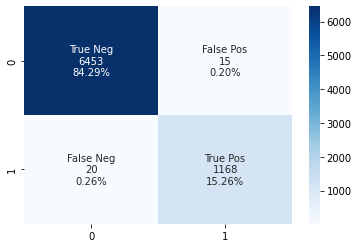

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6468
           1       0.99      0.98      0.99      1188

    accuracy                           1.00      7656
   macro avg       0.99      0.99      0.99      7656
weighted avg       1.00      1.00      1.00      7656

